<a href="https://colab.research.google.com/github/AqilulMuttaqin/PCVK_Genap_2023/blob/main/Week5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [53]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [54]:
import cv2 as cv
import numpy as np
from google.colab.patches import cv2_imshow
from skimage import io
import matplotlib.pyplot as plt

image = cv.imread('/content/drive/MyDrive/PCVK/female1.jpg')

**Tugas No. 1**

 Gamma Correction pada citra 
----------------------------------
Masukkan nilai Gamma: 3


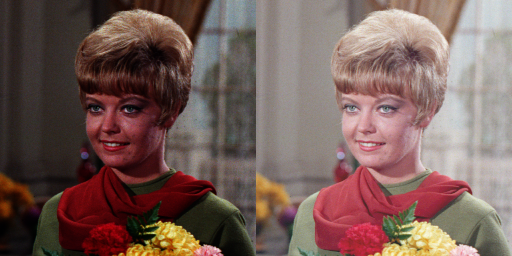

In [73]:
print(' Gamma Correction pada citra ')
print('----------------------------------')

# Mencoba untuk mendapatkan input dari pengguna dan mengonversinya menjadi integer.
try:
    gamma = int(input('Masukkan nilai Gamma: '))
except ValueError:
    print('Error, not a number')

# Fungsi untuk melakukan koreksi gamma pada citra.
def gamma_correction(image, gamma):
    # Memeriksa apakah nilai gamma lebih besar dari 0.
    if gamma <= 0:
        raise ValueError("Nilai gamma harus lebih besar dari 0.")

    # Normalisasi citra ke rentang 0 hingga 1.
    normalized_image = image / 255.0

    # Menghitung koreksi gamma.
    corrected_image = np.power(normalized_image, 1.0 / gamma)

    # Mengembalikan citra dalam rentang 0 hingga 255 dan tipe data np.uint8.
    return (corrected_image * 255).astype(np.uint8)

# Memanggil fungsi gamma_correction untuk menghasilkan citra yang dikoreksi gamma.
corrected_image = gamma_correction(image, gamma)

# Menggabungkan citra asli dan citra yang sudah dikoreksi gamma dalam satu frame horizontal.
final_frame = cv.hconcat((image, corrected_image))

# Menampilkan citra hasil akhir.
cv2_imshow(final_frame)

**Tugas No. 2**

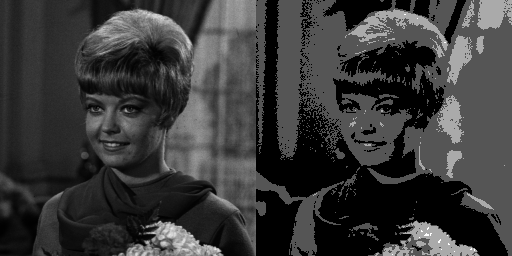

In [56]:
def quantize_image(image, bit_depth):
    # Menghitung jumlah level intensitas warna yang akan digunakan.
    levels = 2 ** bit_depth

    # Menghitung nilai yang mewakili setiap level intensitas warna.
    level_value = 255 / (levels - 1)

    # Melakukan kuantisasi dengan membulatkan setiap piksel ke level intensitas terdekat.
    quantized_image = np.round(image / level_value) * level_value

    # Mengembalikan citra hasil kuantisasi dengan tipe data uint8.
    return quantized_image.astype(np.uint8)

bit_depth = 2
image1 = cv.imread('/content/drive/MyDrive/PCVK/female1.jpg', cv.IMREAD_GRAYSCALE)

# Memanggil fungsi quantize_image untuk menghasilkan citra yang telah dikuantisasi.
depth_image = quantize_image(image1, bit_depth)

final_frame = np.hstack((image1, depth_image))
cv2_imshow(final_frame)

**Tugas No. 3**

In [76]:
# Import library yang dibutuhkan
import cv2 as cv
import numpy as np
import glob
from skimage.metrics import peak_signal_noise_ratio
from matplotlib import pyplot as plt

# Membaca citra asli
original_image = cv.imread('/content/drive/MyDrive/PCVK/galaxy.jpg')

# Membaca semua citra dengan Gaussian Noise dari folder
cv_img = []
for img in glob.glob('/content/drive/MyDrive/PCVK/noise/*.jpg'):
    n = cv.imread(img)
    cv_img.append(n)

# Fungsi untuk denoising rata-rata
def average_denoising(image_list):
    # Menghitung rata-rata citra-citra dengan Gaussian Noise
    average_image = np.zeros(image_list[0].shape, dtype=np.float32)
    for img in image_list:
        average_image += img / len(image_list)

    # Mengkonversi citra rata-rata ke tipe data yang benar
    average_image = average_image.astype(np.uint8)

    return average_image

# Menyiapkan tabel hasil PSNR dan citra hasil average
hasil_psnr = []

# Jumlah citra di Average Image
jumlah_citra_average_image = [5, 30, 60, 80, 100]

# Mencatat hasil PSNR dan citra hasil average
for jumlah_citra in jumlah_citra_average_image:
    # Memilih citra-citra dari cv_img sesuai jumlah_citra
    selected_images = cv_img[:jumlah_citra]

    # Menghilangkan noise dari citra-citra dengan Gaussian Noise
    denoised_image = average_denoising(selected_images)

    # Menghitung PSNR antara citra asli dan citra denoised
    psnr_value = peak_signal_noise_ratio(original_image, denoised_image)

    # Menambahkan hasil PSNR dan citra hasil average ke tabel
    hasil_psnr.append((jumlah_citra, psnr_value, denoised_image))

# Menampilkan tabel hasil PSNR dan citra hasil average dengan border
plt.figure(figsize=(10, 15))  # Increase figsize
for i, (jumlah_citra, psnr_value, avg_image) in enumerate(hasil_psnr):
    plt.subplot(len(hasil_psnr), 2, i * 2 + 1)  # 2 columns for image and info
    plt.imshow(cv.cvtColor(avg_image, cv.COLOR_BGR2RGB))
    plt.axis('on')
    plt.title(f'Image Hasil Average {jumlah_citra}')

    # Menampilkan informasi di sebelah kanan gambar
    info_text = f'Jumlah Citra di Average: {jumlah_citra}\nNilai PSNR (dB): {psnr_value:.2f}'
    plt.text(1.2, 0.5, info_text, fontsize=10, ha='left', transform=plt.gca().transAxes)

    # Add some space between images
    plt.subplots_adjust(hspace=0.5)

plt.show()

IndexError: ignored

**Tugas No. 4**

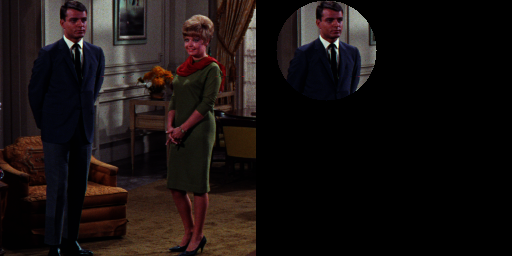

In [66]:
img_t = cv.imread('/content/drive/MyDrive/PCVK/couple.jpg')

# Membuat mask (sebuah citra dengan nilai piksel nol) dengan ukuran yang sama seperti img_t.
mask = np.zeros(img_t.shape, dtype=np.uint8)

# Menentukan pusat dan radius lingkaran yang akan dibuat.
center_coordinates = (70, 50)
radius = 50

# Menggunakan cv.circle untuk menggambar lingkaran pada mask.
mask = cv.circle(mask, center_coordinates, radius, (255, 255, 255), thickness=cv.FILLED)

# Melakukan operasi bitwise AND.
result = cv.bitwise_and(img_t, mask)

circle_frame = np.hstack((img_t, result))
cv2_imshow(circle_frame)

**Tugas No. 5**

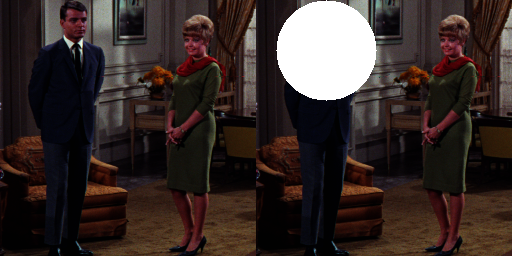

In [59]:
# Membuat mask (sebuah citra dengan nilai piksel nol) dengan ukuran yang sama seperti img_t.
mask = np.zeros(img_t.shape, dtype=np.uint8)

# Menentukan pusat dan radius lingkaran yang akan dibuat.
center_coordinates = (70, 50)
radius = 50

# Menggunakan cv.circle untuk menggambar lingkaran pada mask.
mask = cv.circle(mask, center_coordinates, radius, (255, 255, 255), thickness=cv.FILLED)

# Melakukan operasi bitwise OR.
result = cv.bitwise_or(img_t, mask)

or_frame = np.hstack((img_t, result))
cv2_imshow(or_frame)

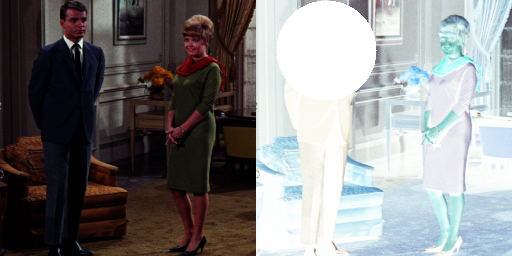

In [60]:
# Membuat mask (sebuah citra dengan nilai piksel nol) dengan ukuran yang sama seperti img_t.
mask = np.zeros(img_t.shape, dtype=np.uint8)

# Menentukan pusat dan radius lingkaran yang akan dibuat.
center_coordinates = (70, 50)
radius = 50

# Menggunakan cv.circle untuk menggambar lingkaran pada mask.
mask = cv.circle(mask, center_coordinates, radius, (255, 255, 255), thickness=cv.FILLED)

# Operasi bitwise NOT pada mask
not_mask = cv.bitwise_not(mask)

# Melakukan operasi bitwise AND antara img_t (gambar asli) dan not_mask
result = cv.bitwise_and(img_t, not_mask)

# Operasi bitwise NOT pada hasil operasi AND
nand_result = cv.bitwise_not(result)

nand_frame = np.hstack((img_t, nand_result))
cv2_imshow(nand_frame)

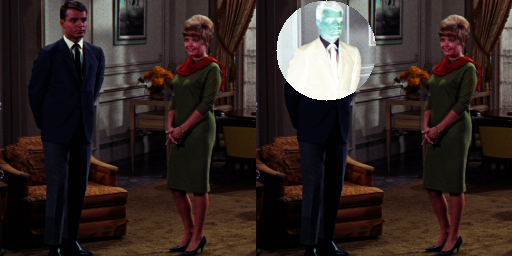

In [61]:
# Membuat mask (sebuah citra dengan nilai piksel nol) dengan ukuran yang sama seperti img_t.
mask = np.zeros(img_t.shape, dtype=np.uint8)

# Menentukan pusat dan radius lingkaran yang akan dibuat.
center_coordinates = (70, 50)
radius = 50

# Menggunakan cv.circle untuk menggambar lingkaran pada mask.
mask = cv.circle(mask, center_coordinates, radius, (255, 255, 255), thickness=cv.FILLED)

# Melakukan operasi bitwise XOR.
result = cv.bitwise_xor(img_t, mask)

xor_frame = np.hstack((img_t, result))
cv2_imshow(xor_frame)